# Seaborn - Heatmap

http://seaborn.pydata.org/generated/seaborn.heatmap.html

In *seaborn*, heatmap mainly helps plot rectangular data as a color-encoded matrix.

This is Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to *ax* argument. 

## Contents

- Change the limits of the colormap
- Plot a heatmap for data centered on 0
- Plot a dataframe with meaningful row and column labels
- Annotate each cell with the numeric value using integer formatting
- Add lines between each cell
- Use a different colormap
- Center the colormap at a specific value
- Don't draw a colorbar
- Plot every other column label and don't plot row labels
- Use different axes for the colorbar
- Use a mask to plot only part of a matrix

## Main arguments

- **data**: rectangular dataset. 2D dataset that can be coerced into an *ndarray*. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

- **vmin, vmax**: floats, optional. Valus to anchor the colormap, otherwise they are inferred from the data and other keyword arguments. When a diverging dataset is inferred, one of these values may be ignored.

- **cmap**: matplotlib colormap name or object, optional. The mapping from data values to color space. If not provided, this will be either a cubehelix map (if the function infers a sequential dataset) or *RdBu_r* (if the function infers a diverging dataset).

- **center**: float, optional. The value at which to center the colormap. Passing this value implies use of a diverging colormap.

- **robust**: bool, optional. If True and *vmin* or *vmax* are absent, the colormap range is computed with robust quantiles instead of the extreme values.

- **annot**: bool or rectangular dataset, optional. If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data.

- **fmt**: string, optional. String formatting code to use when adding annotations.

- **xticklabels** : list-like, int, or bool, optional. [1] If True, plot the column names of the dataframe. [2] If False, don’t plot the column names. [3] If list-like, plot these alternate labels as the xticklabels. [4] If an integer, use the column names but plot only every n label.

- **yticklabels** : list-like, int, or bool, optional. [1]If True, plot the row names of the dataframe. [2] If False, don’t plot the row names. [3] If list-like, plot these alternate labels as the yticklabels. [4] If an integer, use the index names but plot only every n label.

- **square**: bool, optional. If True, set the Axes aspect to "equal" so each cell will be square-shaped.

- **mask**: bool array or DataFrame, optional. If passed, data will not be shown in cells where *mask* is True. Cells with missing valuesare automatically masked.

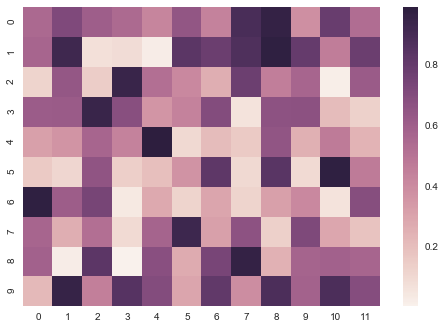

In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set() # reset the default parameters by calling set()

uniform_data = np.random.rand(10, 12)

sns.heatmap(uniform_data)

We can also change the limits of the colormap.

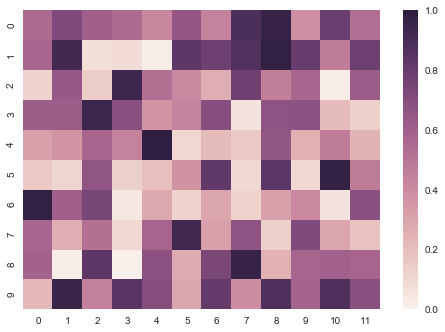

In [2]:
sns.heatmap(uniform_data, vmin=0, vmax=1)

Then we can try to plot a heatmap for data centered on 0.

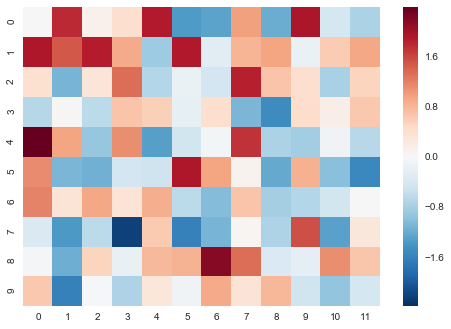

In [3]:
normal_data = np.random.randn(10, 12)
sns.heatmap(normal_data)

Plot a dataframe with meaningful row and column labels

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


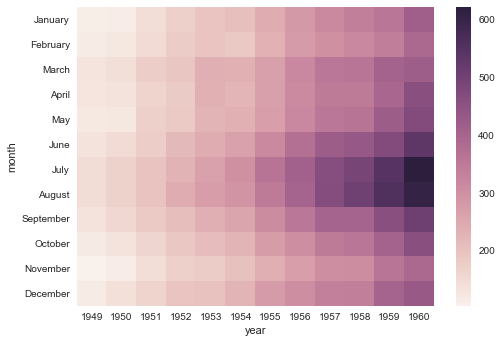

In [4]:
flights = sns.load_dataset('flights')
flights = flights.pivot("month", "year", "passengers")

sns.heatmap(flights)
flights

We can also annotate each cell with the numeric value using integer formatting

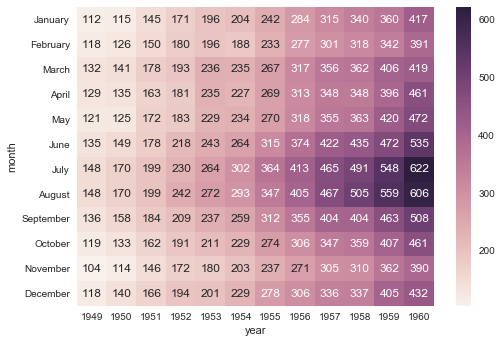

In [5]:
sns.heatmap(flights, annot=True, fmt='d')

Add lines between each cell

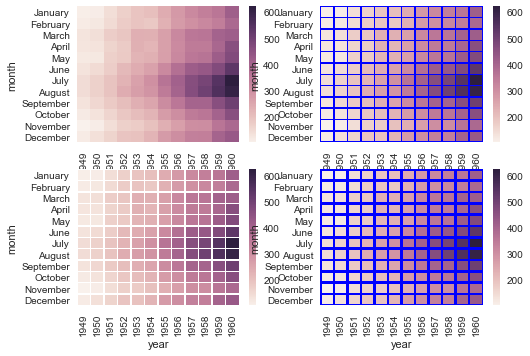

In [6]:
plt.subplot(221)
sns.heatmap(flights)

plt.subplot(222)
sns.heatmap(flights, linecolor='blue', linewidths=.5)

plt.subplot(223)
sns.heatmap(flights, linecolor='white', linewidths=.5)

plt.subplot(224)
sns.heatmap(flights, linecolor='blue', linewidths=1.5)

Use a different colormap

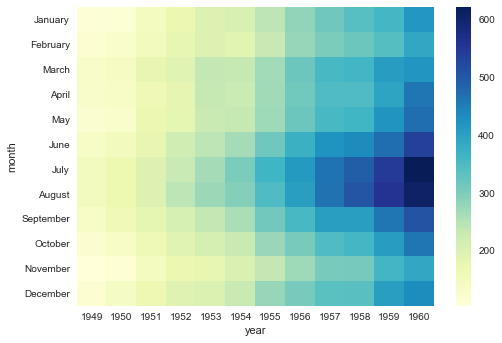

In [7]:
sns.heatmap(flights, cmap = "YlGnBu")

Center the colormap at a specific value

242


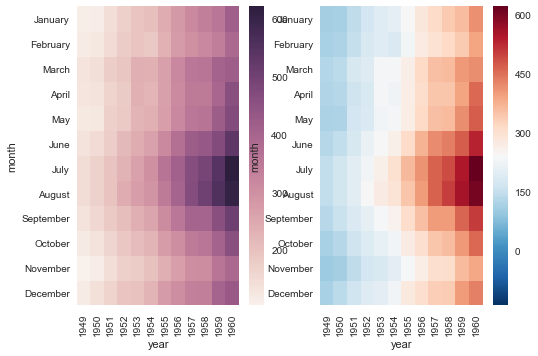

In [8]:
print(flights.loc['January', 1955])

plt.subplot(121)
sns.heatmap(flights)

plt.subplot(122)
sns.heatmap(flights, center=flights.loc['January', 1955])

Don't draw a colorbar

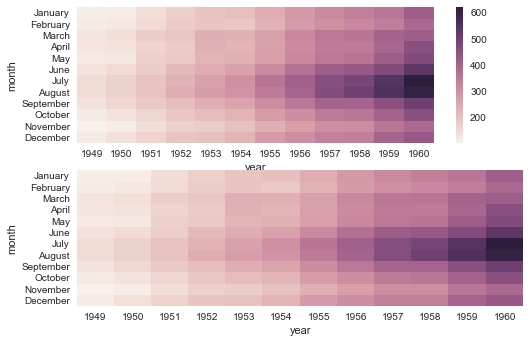

In [9]:
plt.subplot(211)
sns.heatmap(flights)

plt.subplot(212)
sns.heatmap(flights, cbar=False)

Plot every other column label and don't plot row labels

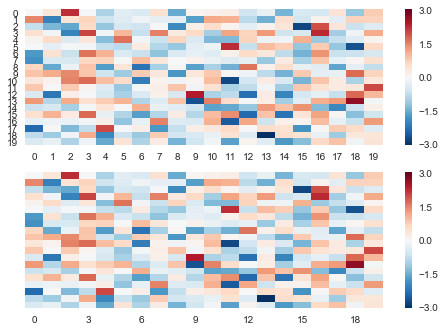

In [10]:
data = np.random.randn(20, 20)

plt.subplot(211)
sns.heatmap(data)

plt.subplot(212)
sns.heatmap(data, xticklabels=3, yticklabels=False)

Use different axes for the colorbar

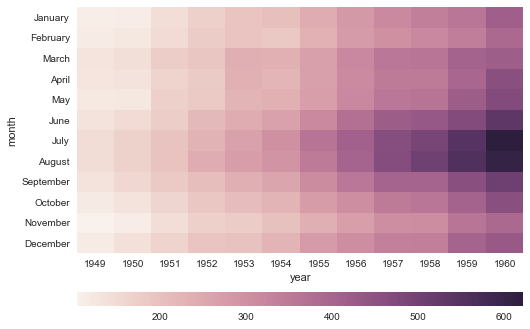

In [11]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

ax = sns.heatmap(flights, ax=ax, cbar_ax=cbar_ax,
            cbar_kws={"orientation":"horizontal"})

Use a mask to plot only part of a matrix

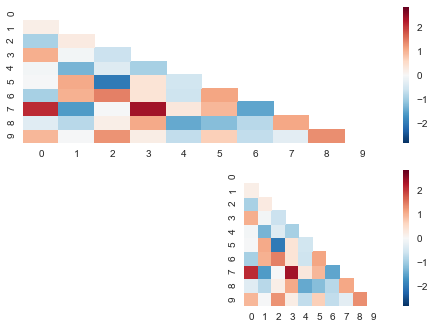

In [12]:
data = np.random.randn(10,10)
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plt.subplot(211)
    sns.heatmap(data, mask=mask)
    
    plt.subplot(212)
    sns.heatmap(data, mask=mask, square=True)